# Taking all we've learned through hypothesis and using k-means clustering to find clusters of similar SA2 ares - looking at our derived personas for PT users

Now to bring it all together - import all of the different indexes, values and counts that represent different aspects of PT use that I've explored so far and work out where the most logical clusters are.

In [196]:
library(readr)
library(plyr)
library(dplyr)
# Note from Dave to Dave - ALWAYS load plyr before dplyr or group_by doesn't work properly
# Note - have updated to use combined_quantity from the 1C dataset to give more meaningful results

Will bring in 1F to serve as the framework for joining. I only need it at SA2 level, so also going to do some aggregation as I go.

In [197]:
SA2_stops_by_mode <- read_csv("Processed Data/1F/SA2_stops_by_mode.csv", col_types = cols(is_bus_stop = col_skip(), is_ferry_stop = col_skip(), is_train_station = col_skip(), is_tram_stop = col_skip(), stop_id = col_skip(), stop_lat = col_skip(), stop_lon = col_skip(), stop_name = col_skip(), stop_url = col_skip()))
SA2_stops_by_mode <- SA2_stops_by_mode %>% group_by (SA2Code, SA2Name, Pop, Score, Team_Member)
SA2_stops_by_mode <- unique(SA2_stops_by_mode)
head(SA2_stops_by_mode)

AREASQKM16,SA2Code,SA2Name,Pop,Score,Team_Member
2.3663,305011105,Brisbane City,10192,1083,Steff
1.2432,305011111,Spring Hill,6063,1028,Dave
1.2745,305011106,Fortitude Valley,7146,1064,Kate
3.0555,305031128,Newstead - Bowen Hills,10638,1132,Steff
9.6008,304041098,Enoggera,8158,1053,Kate
3.5836,305041135,Paddington - Milton,10788,1137,Steff


Now, let's do a series of importing our output datasets from other notebooks that represent different outputs from our hypothesis.

First, accessible_data from the xxxxx hypothesis. This will bring in:
- number of employees
- percentage of population unemployed
- number of people who work from home
- number of people who only use PT to commute
- number of houses in the area
- the percentage of houses without access to a car in the area

In [198]:
accessible_data <- read_csv("Cluster/accessible_data.csv", col_types = cols(Pop = col_skip(), SA2Name = col_skip(), Score = col_skip(), Team_Member = col_skip(), Total_dwelings_1 = col_skip(), dwellings_with_no_cars = col_skip(), dwellings_with_no_cars_1 = col_skip(), percentage_houses_no_cars_1 = col_skip()))
working_data <- merge(SA2_stops_by_mode, accessible_data, by="SA2Code")
head(working_data)

Warning message:
"Duplicated column names deduplicated: 'dwellings_with_no_cars' => 'dwellings_with_no_cars_1' [13], 'Total_dwelings' => 'Total_dwelings_1' [14], 'percentage_houses_no_cars' => 'percentage_houses_no_cars_1' [15]"

SA2Code,AREASQKM16,SA2Name,Pop,Score,Team_Member,number_of_employees,percent_unemployed,number_worked_from_home,pt_to_work,Total_dwelings,percentage_houses_no_cars
301011001,13.6312,Alexandra Hills,16345,987,Charlie,8311,49.15265,291,343,5619,3.594946
301011002,33.1072,Belmont - Gumdale,7375,1093,Steff,3835,48.00000,286,211,2299,1.783384
301011003,11.5987,Birkdale,14923,1034,Dave,7349,50.75387,355,431,5060,3.339921
301011004,18.8890,Capalaba,17588,991,Charlie,8995,48.85718,348,344,6399,4.860134
301011005,2.6658,Thorneside,3761,983,Charlie,1836,51.18320,75,141,1530,3.986928
301011006,9.4040,Wellington Point,11576,1062,Kate,5975,48.38459,302,357,3944,2.231237


Next, our working from home index from the XXXX hypothesis, which will add:
- percentage of people working from home

In [199]:
wfh_index <- read_csv("Cluster/wfh_index.csv", col_types = cols(SA2Name = col_skip(), Team_Member = col_skip(), number_of_employees = col_skip(), number_worked_from_home = col_skip()))
working_data <- merge(working_data, wfh_index, by="SA2Code")
head(working_data)

SA2Code,AREASQKM16,SA2Name,Pop,Score,Team_Member,number_of_employees,percent_unemployed,number_worked_from_home,pt_to_work,Total_dwelings,percentage_houses_no_cars,percentage_wfh
301011001,13.6312,Alexandra Hills,16345,987,Charlie,8311,49.15265,291,343,5619,3.594946,0.03501384
301011002,33.1072,Belmont - Gumdale,7375,1093,Steff,3835,48.00000,286,211,2299,1.783384,0.07457627
301011003,11.5987,Birkdale,14923,1034,Dave,7349,50.75387,355,431,5060,3.339921,0.04830589
301011004,18.8890,Capalaba,17588,991,Charlie,8995,48.85718,348,344,6399,4.860134,0.03868816
301011005,2.6658,Thorneside,3761,983,Charlie,1836,51.18320,75,141,1530,3.986928,0.04084967
301011006,9.4040,Wellington Point,11576,1062,Kate,5975,48.38459,302,357,3944,2.231237,0.05054393


Next, our number of physical stops from the XXXX hypothesis, which will add:
- the number of available physical stops

In [200]:
pt_services_by_SA2_v2 <- read_csv("Cluster/pt_services_by_SA2_v2.csv", col_types = cols(SA2Name = col_skip(), Score = col_skip(), Team_Member = col_skip()))
colnames(pt_services_by_SA2_v2)[colnames(pt_services_by_SA2_v2)=="n"] <- "number_of_stops"
working_data <- merge(working_data, pt_services_by_SA2_v2, by="SA2Code")
head(working_data)

SA2Code,AREASQKM16,SA2Name,Pop,Score,Team_Member,number_of_employees,percent_unemployed,number_worked_from_home,pt_to_work,Total_dwelings,percentage_houses_no_cars,percentage_wfh,number_of_stops
301011001,13.6312,Alexandra Hills,16345,987,Charlie,8311,49.15265,291,343,5619,3.594946,0.03501384,3486
301011002,33.1072,Belmont - Gumdale,7375,1093,Steff,3835,48.00000,286,211,2299,1.783384,0.07457627,3147
301011003,11.5987,Birkdale,14923,1034,Dave,7349,50.75387,355,431,5060,3.339921,0.04830589,2881
301011004,18.8890,Capalaba,17588,991,Charlie,8995,48.85718,348,344,6399,4.860134,0.03868816,4788
301011005,2.6658,Thorneside,3761,983,Charlie,1836,51.18320,75,141,1530,3.986928,0.04084967,1519
301011006,9.4040,Wellington Point,11576,1062,Kate,5975,48.38459,302,357,3944,2.231237,0.05054393,2062


Next, let's grab the total number of trips taken per SA2 and the average number of trips taken per available physical stop from the XXXX hypothesis. This will add:
- total number of trips
- average trips per stop

In [201]:
SA2_with_qty_stops_and_avg <- read_csv("Cluster/SA2_with_qty_stops_and_avg.csv", col_types = cols(Pop = col_skip(), SA2Name = col_skip(), Score = col_skip(), Team_Member = col_skip(), n = col_skip()))
colnames(SA2_with_qty_stops_and_avg)[colnames(SA2_with_qty_stops_and_avg)=="combined_quantity"] <- "total_trips"
working_data <- merge(working_data, SA2_with_qty_stops_and_avg, by="SA2Code")
head(working_data)

SA2Code,AREASQKM16,SA2Name,Pop,Score,Team_Member,number_of_employees,percent_unemployed,number_worked_from_home,pt_to_work,Total_dwelings,percentage_houses_no_cars,percentage_wfh,number_of_stops,total_trips,avg_trips_per_stop
301011001,13.6312,Alexandra Hills,16345,987,Charlie,8311,49.15265,291,343,5619,3.594946,0.03501384,3486,231473,2048.434
301011002,33.1072,Belmont - Gumdale,7375,1093,Steff,3835,48.00000,286,211,2299,1.783384,0.07457627,3147,125180,2663.404
301011003,11.5987,Birkdale,14923,1034,Dave,7349,50.75387,355,431,5060,3.339921,0.04830589,2881,446086,7826.070
301011004,18.8890,Capalaba,17588,991,Charlie,8995,48.85718,348,344,6399,4.860134,0.03868816,4788,684247,5702.058
301011005,2.6658,Thorneside,3761,983,Charlie,1836,51.18320,75,141,1530,3.986928,0.04084967,1519,159068,6362.720
301011006,9.4040,Wellington Point,11576,1062,Kate,5975,48.38459,302,357,3944,2.231237,0.05054393,2062,274407,7036.077


Now let's bring in our travel hub index score from the XXXX hypothesis. This will give us:
- travel hub index, where a smaller numbers are less likely to be hubs and larger numbers are more likely to be hubs

In [202]:
travel_hub_index <- read_csv("Cluster/travel_hub_index.csv", col_types = cols(Pop = col_skip(), SA2Name = col_skip(), Score = col_skip(), Team_Member = col_skip(), avg_trips_per_stop = col_skip(), combined_quantity = col_skip(), n = col_skip()))
colnames(travel_hub_index)[colnames(travel_hub_index)=="index"] <- "travel_hub_index"
working_data <- merge(working_data, travel_hub_index, by="SA2Code")
head(working_data)

SA2Code,AREASQKM16,SA2Name,Pop,Score,Team_Member,number_of_employees,percent_unemployed,number_worked_from_home,pt_to_work,Total_dwelings,percentage_houses_no_cars,percentage_wfh,number_of_stops,total_trips,avg_trips_per_stop,travel_hub_index
301011001,13.6312,Alexandra Hills,16345,987,Charlie,8311,49.15265,291,343,5619,3.594946,0.03501384,3486,231473,2048.434,0.1253248
301011002,33.1072,Belmont - Gumdale,7375,1093,Steff,3835,48.00000,286,211,2299,1.783384,0.07457627,3147,125180,2663.404,0.3611396
301011003,11.5987,Birkdale,14923,1034,Dave,7349,50.75387,355,431,5060,3.339921,0.04830589,2881,446086,7826.070,0.5244301
301011004,18.8890,Capalaba,17588,991,Charlie,8995,48.85718,348,344,6399,4.860134,0.03868816,4788,684247,5702.058,0.3242016
301011005,2.6658,Thorneside,3761,983,Charlie,1836,51.18320,75,141,1530,3.986928,0.04084967,1519,159068,6362.720,1.6917628
301011006,9.4040,Wellington Point,11576,1062,Kate,5975,48.38459,302,357,3944,2.231237,0.05054393,2062,274407,7036.077,0.6078159


Finally, let's bring in the percentage of trips that happen on weekends from the XXXX hypothesis.

In [203]:
SA2_norm_weekend_percentage <- read_csv("Cluster/SA2__norm_weekend_percentage.csv", col_types = cols(SA2Name = col_skip(), Team_Member = col_skip(), normalised_non_working_time = col_skip(), normalised_working_time = col_skip()))
working_data <- merge(working_data, SA2_norm_weekend_percentage, by="SA2Code")
working_data$reliance_on_PT <-  with(working_data, (pt_to_work / number_of_employees)*100)
head(working_data)

SA2Code,AREASQKM16,SA2Name,Pop,Score,Team_Member,number_of_employees,percent_unemployed,number_worked_from_home,pt_to_work,Total_dwelings,percentage_houses_no_cars,percentage_wfh,number_of_stops,total_trips,avg_trips_per_stop,travel_hub_index,norm_weekend_percentage,reliance_on_PT
301011001,13.6312,Alexandra Hills,16345,987,Charlie,8311,49.15265,291,343,5619,3.594946,0.03501384,3486,231473,2048.434,0.1253248,9.637096,4.127061
301011002,33.1072,Belmont - Gumdale,7375,1093,Steff,3835,48.00000,286,211,2299,1.783384,0.07457627,3147,125180,2663.404,0.3611396,11.032762,5.501956
301011003,11.5987,Birkdale,14923,1034,Dave,7349,50.75387,355,431,5060,3.339921,0.04830589,2881,446086,7826.070,0.5244301,11.133305,5.864744
301011004,18.8890,Capalaba,17588,991,Charlie,8995,48.85718,348,344,6399,4.860134,0.03868816,4788,684247,5702.058,0.3242016,12.428423,3.824347
301011005,2.6658,Thorneside,3761,983,Charlie,1836,51.18320,75,141,1530,3.986928,0.04084967,1519,159068,6362.720,1.6917628,8.483446,7.679739
301011006,9.4040,Wellington Point,11576,1062,Kate,5975,48.38459,302,357,3944,2.231237,0.05054393,2062,274407,7036.077,0.6078159,9.686038,5.974895


Now we've got a big working dataset, lets play with a few different subsets to see which gives us meaningful/the most useful clusters of areas to work with.

In [204]:
# data_cluster <- working_data[,c("SA2Name", "Score", "norm_weekend_percentage", "avg_trips_per_stop", "percentage_houses_no_cars")]
data_cluster <- working_data[,c("SA2Name", "Score", "norm_weekend_percentage", "avg_trips_per_stop", "reliance_on_PT")]

head(data_cluster)

SA2Name,Score,norm_weekend_percentage,avg_trips_per_stop,reliance_on_PT
Alexandra Hills,987,9.637096,2048.434,4.127061
Belmont - Gumdale,1093,11.032762,2663.404,5.501956
Birkdale,1034,11.133305,7826.070,5.864744
Capalaba,991,12.428423,5702.058,3.824347
Thorneside,983,8.483446,6362.720,7.679739
Wellington Point,1062,9.686038,7036.077,5.974895


In [205]:
cluster_results <- kmeans(data_cluster[,2:5], 5)
data_cluster$cluster <- as.factor(cluster_results$cluster)
head(data_cluster)

SA2Name,Score,norm_weekend_percentage,avg_trips_per_stop,reliance_on_PT,cluster
Alexandra Hills,987,9.637096,2048.434,4.127061,5
Belmont - Gumdale,1093,11.032762,2663.404,5.501956,5
Birkdale,1034,11.133305,7826.070,5.864744,5
Capalaba,991,12.428423,5702.058,3.824347,5
Thorneside,983,8.483446,6362.720,7.679739,5
Wellington Point,1062,9.686038,7036.077,5.974895,5


In [206]:
indiv_cluster <- subset(data_cluster, cluster == "1")
head(indiv_cluster)
summary(indiv_cluster)

indiv_cluster <- subset(data_cluster, cluster == "2")
head(indiv_cluster)
summary(indiv_cluster)

indiv_cluster <- subset(data_cluster, cluster == "3")
head(indiv_cluster)
summary(indiv_cluster)

indiv_cluster <- subset(data_cluster, cluster == "4")
head(indiv_cluster)
summary(indiv_cluster)

indiv_cluster <- subset(data_cluster, cluster == "5")
head(indiv_cluster)
summary(indiv_cluster)


,SA2Name,Score,norm_weekend_percentage,avg_trips_per_stop,reliance_on_PT,cluster
102,Brisbane City,1083,25.59937,318995.1,13.41486,1
107,South Brisbane,1082,33.70133,447138.6,19.67861,1


   SA2Name              Score      norm_weekend_percentage avg_trips_per_stop
 Length:2           Min.   :1082   Min.   :25.60           Min.   :318995    
 Class :character   1st Qu.:1082   1st Qu.:27.62           1st Qu.:351031    
 Mode  :character   Median :1082   Median :29.65           Median :383067    
                    Mean   :1082   Mean   :29.65           Mean   :383067    
                    3rd Qu.:1083   3rd Qu.:31.68           3rd Qu.:415103    
                    Max.   :1083   Max.   :33.70           Max.   :447139    
 reliance_on_PT  cluster
 Min.   :13.41   1:2    
 1st Qu.:14.98   2:0    
 Median :16.55   3:0    
 Mean   :16.55   4:0    
 3rd Qu.:18.11   5:0    
 Max.   :19.68          

,SA2Name,Score,norm_weekend_percentage,avg_trips_per_stop,reliance_on_PT,cluster
16,Murarrie,1066,13.616687,22796.47,11.87050,2
21,Bald Hills,1013,8.460389,15503.35,10.63479,2
27,Chermside,975,25.395911,24267.43,16.11857,2
34,Boondall,1009,15.302779,15405.05,11.40137,2
35,Brisbane Airport,1134,36.392373,29481.24,7.54717,2
37,Northgate - Virginia,1049,14.704025,25880.02,18.27160,2


   SA2Name              Score        norm_weekend_percentage avg_trips_per_stop
 Length:86          Min.   : 773.0   Min.   : 7.663          Min.   :15167     
 Class :character   1st Qu.: 982.8   1st Qu.:14.171          1st Qu.:18870     
 Mode  :character   Median :1041.0   Median :17.414          Median :23530     
                    Mean   :1029.3   Mean   :19.393          Mean   :24271     
                    3rd Qu.:1084.8   3rd Qu.:22.893          3rd Qu.:29302     
                    Max.   :1146.0   Max.   :41.385          Max.   :42896     
 reliance_on_PT   cluster
 Min.   : 1.536   1: 0   
 1st Qu.: 6.156   2:86   
 Median :12.496   3: 0   
 Mean   :11.654   4: 0   
 3rd Qu.:16.231   5: 0   
 Max.   :23.267          

,SA2Name,Score,norm_weekend_percentage,avg_trips_per_stop,reliance_on_PT,cluster
13,Redland Islands,852,27.98498,250349.0,5.664926,3
57,Woolloongabba,1051,19.45062,133340.8,23.239197,3
95,St Lucia,1096,25.74922,135426.5,18.044949,3
103,Fortitude Valley,1064,25.73140,185168.0,19.828156,3
138,Mermaid Beach - Broadbeach,1022,43.95823,179614.2,6.591887,3
178,Surfers Paradise,983,45.46037,131691.0,10.523971,3


   SA2Name              Score        norm_weekend_percentage avg_trips_per_stop
 Length:6           Min.   : 852.0   Min.   :19.45           Min.   :131691    
 Class :character   1st Qu.: 992.8   1st Qu.:25.74           1st Qu.:133862    
 Mode  :character   Median :1036.5   Median :26.87           Median :157520    
                    Mean   :1011.3   Mean   :31.39           Mean   :169265    
                    3rd Qu.:1060.8   3rd Qu.:39.96           3rd Qu.:183780    
                    Max.   :1096.0   Max.   :45.46           Max.   :250349    
 reliance_on_PT   cluster
 Min.   : 5.665   1:0    
 1st Qu.: 7.575   2:0    
 Median :14.284   3:6    
 Mean   :13.982   4:0    
 3rd Qu.:19.382   5:0    
 Max.   :23.239          

,SA2Name,Score,norm_weekend_percentage,avg_trips_per_stop,reliance_on_PT,cluster
64,Upper Mount Gravatt,1016,25.93583,74199.35,14.15071,4
68,Robertson,1038,34.95169,66083.00,15.40643,4
93,Indooroopilly,1097,22.85364,47930.14,19.41256,4
101,Upper Kedron - Ferny Grove,1090,9.37141,50519.50,12.99069,4
123,Kelvin Grove - Herston,1067,19.70315,102239.21,19.37184,4
124,Newmarket,1082,21.38739,46677.50,19.48465,4


   SA2Name              Score      norm_weekend_percentage avg_trips_per_stop
 Length:12          Min.   : 939   Min.   : 9.371          Min.   : 46350    
 Class :character   1st Qu.:1012   1st Qu.:20.061          1st Qu.: 47963    
 Mode  :character   Median :1074   Median :21.449          Median : 54340    
                    Mean   :1058   Mean   :22.240          Mean   : 63865    
                    3rd Qu.:1101   3rd Qu.:26.334          3rd Qu.: 75727    
                    Max.   :1132   Max.   :34.952          Max.   :102239    
 reliance_on_PT   cluster
 Min.   : 1.684   1: 0   
 1st Qu.:12.200   2: 0   
 Median :17.389   3: 0   
 Mean   :15.174   4:12   
 3rd Qu.:19.593   5: 0   
 Max.   :20.663          

SA2Name,Score,norm_weekend_percentage,avg_trips_per_stop,reliance_on_PT,cluster
Alexandra Hills,987,9.637096,2048.434,4.127061,5
Belmont - Gumdale,1093,11.032762,2663.404,5.501956,5
Birkdale,1034,11.133305,7826.070,5.864744,5
Capalaba,991,12.428423,5702.058,3.824347,5
Thorneside,983,8.483446,6362.720,7.679739,5
Wellington Point,1062,9.686038,7036.077,5.974895,5


   SA2Name              Score        norm_weekend_percentage avg_trips_per_stop
 Length:186         Min.   : 793.0   Min.   : 0.4744         Min.   :   23.67  
 Class :character   1st Qu.: 957.5   1st Qu.:12.0791         1st Qu.: 2868.17  
 Mode  :character   Median :1018.0   Median :15.7452         Median : 4992.28  
                    Mean   :1009.5   Mean   :17.1896         Mean   : 5913.80  
                    3rd Qu.:1057.8   3rd Qu.:20.6575         3rd Qu.: 9123.06  
                    Max.   :1170.0   Max.   :44.0364         Max.   :14918.50  
 reliance_on_PT   cluster
 Min.   : 0.355   1:  0  
 1st Qu.: 2.116   2:  0  
 Median : 3.858   3:  0  
 Mean   : 5.401   4:  0  
 3rd Qu.: 7.963   5:186  
 Max.   :17.197          

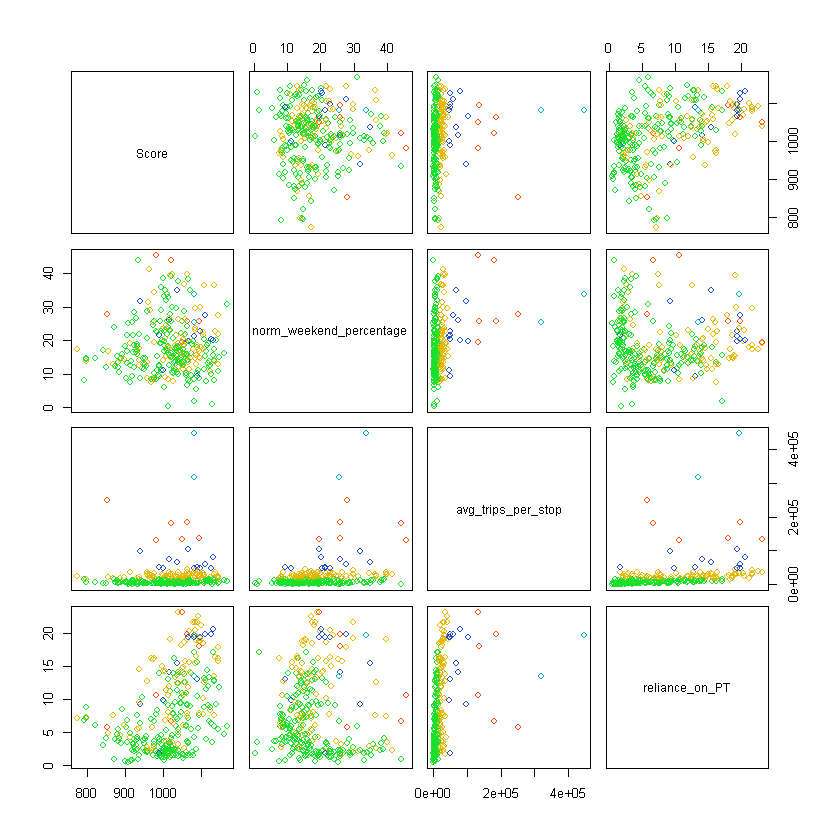

In [208]:
my_cols <- c("#00AFBB", "#E7B800", "#FC4E07","#204dcf", "#19e02c" )  
pairs(data_cluster[,2:5], col = my_cols[data_cluster$cluster])

Happy with results, it looks like there's a few clusters that are specific enough to become personas. Going to explore to look at visually.

In [209]:
ref_data<- read_csv("Processed Data/1F/SA2_stops_by_mode.csv", col_types = cols(AREASQKM16 = col_skip(), Pop = col_skip(), Score = col_skip(), Team_Member = col_skip(), is_bus_stop = col_skip(), is_ferry_stop = col_skip(), is_train_station = col_skip(),  is_tram_stop = col_skip(), stop_id = col_skip(),  stop_lat = col_skip(), stop_lon = col_skip(), stop_name = col_skip(), stop_url = col_skip()))
ref_data <- unique(ref_data)
data_cluster <- merge(ref_data, data_cluster, by="SA2Name")

summary(data_cluster)
# write.csv(data_cluster,"data_cluster.csv", row.names = FALSE)

   SA2Name             SA2Code              Score      norm_weekend_percentage
 Length:292         Min.   :301011001   Min.   : 773   Min.   : 0.4744        
 Class :character   1st Qu.:303051075   1st Qu.: 977   1st Qu.:12.8778        
 Mode  :character   Median :309031236   Median :1024   Median :16.6853        
                    Mean   :307873614   Mean   :1018   Mean   :18.4231        
                    3rd Qu.:311051323   3rd Qu.:1067   3rd Qu.:22.6742        
                    Max.   :319031514   Max.   :1170   Max.   :45.4604        
 avg_trips_per_stop reliance_on_PT   cluster
 Min.   :    23.7   Min.   : 0.355   1:  2  
 1st Qu.:  3724.3   1st Qu.: 2.605   2: 86  
 Median :  9457.0   Median : 6.196   3:  6  
 Mean   : 19641.6   Mean   : 7.897   4: 12  
 3rd Qu.: 21002.8   3rd Qu.:12.611   5:186  
 Max.   :447138.6   Max.   :23.267          

In [210]:
data_cluster_2 <- subset(data_cluster, cluster =="1" | cluster == "2" | cluster == "3" | cluster == "5")
summary(data_cluster_2)
# write.csv(data_cluster_2,"data_cluster_2.csv", row.names = FALSE)

   SA2Name             SA2Code              Score       
 Length:280         Min.   :301011001   Min.   : 773.0  
 Class :character   1st Qu.:303051074   1st Qu.: 975.8  
 Mode  :character   Median :309031238   Median :1023.0  
                    Mean   :307930681   Mean   :1016.1  
                    3rd Qu.:311051324   3rd Qu.:1065.2  
                    Max.   :319031514   Max.   :1170.0  
 norm_weekend_percentage avg_trips_per_stop reliance_on_PT   cluster
 Min.   : 0.4744         Min.   :    23.7   Min.   : 0.355   1:  2  
 1st Qu.:12.8351         1st Qu.:  3640.3   1st Qu.: 2.549   2: 86  
 Median :16.5444         Median :  9159.0   Median : 5.874   3:  6  
 Mean   :18.2595         Mean   : 17746.3   Mean   : 7.585   4:  0  
 3rd Qu.:22.4640         3rd Qu.: 19432.5   3rd Qu.:11.893   5:186  
 Max.   :45.4604         Max.   :447138.6   Max.   :23.267          